In [6]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.regularizers import l2
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



In [22]:
dataset_sentences = "/content/drive/MyDrive/LSTM/datasetSentences.txt"
sentiment_labels = "/content/drive/MyDrive/LSTM/sentiment_labels.txt"

# Read the dataset sentences
data = pd.read_csv(dataset_sentences, delimiter='\t', encoding='latin-1')
# Read the sentiment labels
sentiment_data = pd.read_csv(sentiment_labels, delimiter='|')

# Merge the two datasets on 'sentence_index'
merged_data = pd.merge(data, sentiment_data, left_on='sentence_index', right_on='phrase ids')

# Preprocess the data
max_length = 100  # Maximum length of input sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(merged_data['sentence'])
sequences = tokenizer.texts_to_sequences(merged_data['sentence'])
X = pad_sequences(sequences, maxlen=max_length)
y = merged_data['sentiment values']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    LSTM(8, kernel_regularizer=l2(0.01)),  # Add L2 regularization to LSTM layer
    #Dense(8, activation='relu'),
   # Dense(4, activation='sigmoid'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


Epoch 1/5
238/238 [==============================] - 21s 76ms/step - loss: 0.1821 - val_loss: 0.0380
Epoch 2/5
238/238 [==============================] - 16s 69ms/step - loss: 0.0312 - val_loss: 0.0308
Epoch 3/5
238/238 [==============================] - 16s 69ms/step - loss: 0.0287 - val_loss: 0.0314
Epoch 4/5
238/238 [==============================] - 16s 69ms/step - loss: 0.0254 - val_loss: 0.0346
Epoch 5/5
75/75 [==============================] - 1s 11ms/step - loss: 0.0362
Test Loss: 0.036167293787002563


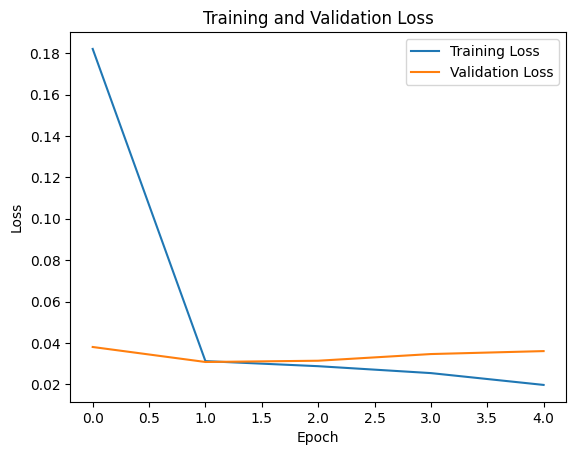

In [24]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()